## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  11.211223   795.929601  0.653591  2.581563   520.273110
1  40.279845   992.218699  0.918291  9.343180   911.841259
2  54.832834  1212.411763  0.335667  6.599290   410.563518
3  76.294112  1149.086765  0.910772  6.806288  1049.385050
4  47.653827  1004.748808  0.064720  2.348311    80.444268


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9833068	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9706430	total: 58.2ms	remaining: 29s
2:	learn: 0.9593292	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9479135	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9331026	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9219977	total: 60.2ms	remaining: 9.97s
6:	learn: 0.9093015	total: 60.7ms	remaining: 8.61s
7:	learn: 0.8951134	total: 61.1ms	remaining: 7.58s
8:	learn: 0.8851727	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8736719	total: 62ms	remaining: 6.14s
10:	learn: 0.8633632	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8486159	total: 63ms	remaining: 5.19s
12:	learn: 0.8358047	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8227206	total: 64ms	remaining: 4.51s
14:	learn: 0.8105132	total: 64.4ms	remaining: 4.23s
15:	learn: 0.8001561	total: 64.9ms	remaining: 3.99s
16:	learn: 0.7886900	total: 65.3ms	remaining: 3.77s
17:	learn: 0.7810136	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7722362	total: 66.2ms	remaining: 3.42s


102:	learn: 0.2825257	total: 106ms	remaining: 921ms
103:	learn: 0.2793848	total: 106ms	remaining: 917ms
104:	learn: 0.2773228	total: 107ms	remaining: 910ms
105:	learn: 0.2742726	total: 107ms	remaining: 903ms
106:	learn: 0.2712754	total: 108ms	remaining: 898ms
107:	learn: 0.2680761	total: 108ms	remaining: 892ms
108:	learn: 0.2648415	total: 108ms	remaining: 886ms
109:	learn: 0.2622779	total: 109ms	remaining: 880ms
110:	learn: 0.2591948	total: 109ms	remaining: 876ms
111:	learn: 0.2558794	total: 110ms	remaining: 871ms
112:	learn: 0.2525240	total: 110ms	remaining: 866ms
113:	learn: 0.2498085	total: 111ms	remaining: 862ms
114:	learn: 0.2475093	total: 111ms	remaining: 857ms
115:	learn: 0.2450181	total: 112ms	remaining: 852ms
116:	learn: 0.2426527	total: 112ms	remaining: 848ms
117:	learn: 0.2394499	total: 113ms	remaining: 843ms
118:	learn: 0.2368885	total: 113ms	remaining: 838ms
119:	learn: 0.2344789	total: 114ms	remaining: 834ms
120:	learn: 0.2313934	total: 114ms	remaining: 829ms
121:	learn: 

273:	learn: 0.0622485	total: 186ms	remaining: 492ms
274:	learn: 0.0618525	total: 187ms	remaining: 492ms
275:	learn: 0.0613475	total: 187ms	remaining: 491ms
276:	learn: 0.0609929	total: 188ms	remaining: 490ms
277:	learn: 0.0605613	total: 188ms	remaining: 489ms
278:	learn: 0.0601074	total: 189ms	remaining: 487ms
279:	learn: 0.0597276	total: 189ms	remaining: 486ms
280:	learn: 0.0593287	total: 189ms	remaining: 485ms
281:	learn: 0.0589271	total: 190ms	remaining: 483ms
282:	learn: 0.0585501	total: 190ms	remaining: 482ms
283:	learn: 0.0582439	total: 191ms	remaining: 481ms
284:	learn: 0.0579045	total: 191ms	remaining: 480ms
285:	learn: 0.0574688	total: 192ms	remaining: 478ms
286:	learn: 0.0571576	total: 192ms	remaining: 477ms
287:	learn: 0.0568560	total: 192ms	remaining: 475ms
288:	learn: 0.0564734	total: 193ms	remaining: 475ms
289:	learn: 0.0560545	total: 193ms	remaining: 473ms
290:	learn: 0.0556967	total: 194ms	remaining: 472ms
291:	learn: 0.0553803	total: 194ms	remaining: 470ms
292:	learn: 

496:	learn: 0.0206763	total: 288ms	remaining: 292ms
497:	learn: 0.0205883	total: 289ms	remaining: 291ms
498:	learn: 0.0205080	total: 289ms	remaining: 291ms
499:	learn: 0.0204085	total: 290ms	remaining: 290ms
500:	learn: 0.0203051	total: 290ms	remaining: 289ms
501:	learn: 0.0202540	total: 291ms	remaining: 289ms
502:	learn: 0.0202039	total: 291ms	remaining: 288ms
503:	learn: 0.0201026	total: 292ms	remaining: 287ms
504:	learn: 0.0200533	total: 293ms	remaining: 287ms
505:	learn: 0.0199759	total: 293ms	remaining: 286ms
506:	learn: 0.0198608	total: 294ms	remaining: 285ms
507:	learn: 0.0198072	total: 294ms	remaining: 285ms
508:	learn: 0.0196945	total: 295ms	remaining: 284ms
509:	learn: 0.0195976	total: 296ms	remaining: 284ms
510:	learn: 0.0195168	total: 296ms	remaining: 284ms
511:	learn: 0.0194366	total: 297ms	remaining: 283ms
512:	learn: 0.0193899	total: 297ms	remaining: 282ms
513:	learn: 0.0193114	total: 298ms	remaining: 281ms
514:	learn: 0.0192177	total: 298ms	remaining: 281ms
515:	learn: 

667:	learn: 0.0111227	total: 369ms	remaining: 183ms
668:	learn: 0.0110914	total: 370ms	remaining: 183ms
669:	learn: 0.0110398	total: 370ms	remaining: 182ms
670:	learn: 0.0110245	total: 370ms	remaining: 182ms
671:	learn: 0.0109977	total: 371ms	remaining: 181ms
672:	learn: 0.0109713	total: 371ms	remaining: 180ms
673:	learn: 0.0109207	total: 372ms	remaining: 180ms
674:	learn: 0.0109052	total: 372ms	remaining: 179ms
675:	learn: 0.0108722	total: 373ms	remaining: 179ms
676:	learn: 0.0108569	total: 373ms	remaining: 178ms
677:	learn: 0.0108312	total: 374ms	remaining: 178ms
678:	learn: 0.0107818	total: 374ms	remaining: 177ms
679:	learn: 0.0107669	total: 375ms	remaining: 176ms
680:	learn: 0.0107417	total: 375ms	remaining: 176ms
681:	learn: 0.0106848	total: 376ms	remaining: 175ms
682:	learn: 0.0106701	total: 376ms	remaining: 175ms
683:	learn: 0.0106454	total: 377ms	remaining: 174ms
684:	learn: 0.0105872	total: 377ms	remaining: 174ms
685:	learn: 0.0105653	total: 378ms	remaining: 173ms
686:	learn: 

883:	learn: 0.0059964	total: 471ms	remaining: 61.8ms
884:	learn: 0.0059893	total: 472ms	remaining: 61.3ms
885:	learn: 0.0059824	total: 472ms	remaining: 60.8ms
886:	learn: 0.0059756	total: 473ms	remaining: 60.2ms
887:	learn: 0.0059688	total: 473ms	remaining: 59.7ms
888:	learn: 0.0059552	total: 474ms	remaining: 59.2ms
889:	learn: 0.0059354	total: 474ms	remaining: 58.6ms
890:	learn: 0.0059288	total: 475ms	remaining: 58.1ms
891:	learn: 0.0059155	total: 475ms	remaining: 57.5ms
892:	learn: 0.0058840	total: 476ms	remaining: 57ms
893:	learn: 0.0058775	total: 476ms	remaining: 56.4ms
894:	learn: 0.0058711	total: 477ms	remaining: 55.9ms
895:	learn: 0.0058647	total: 477ms	remaining: 55.4ms
896:	learn: 0.0058550	total: 477ms	remaining: 54.8ms
897:	learn: 0.0058488	total: 478ms	remaining: 54.3ms
898:	learn: 0.0058404	total: 478ms	remaining: 53.8ms
899:	learn: 0.0058212	total: 479ms	remaining: 53.2ms
900:	learn: 0.0057826	total: 479ms	remaining: 52.6ms
901:	learn: 0.0057643	total: 480ms	remaining: 52

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

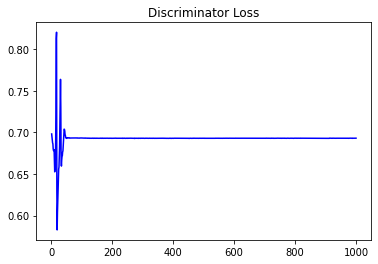

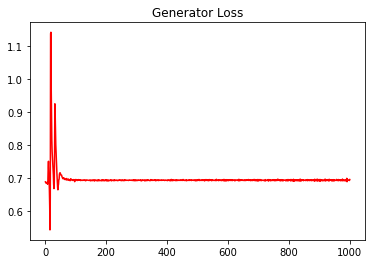

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.009932459516991564


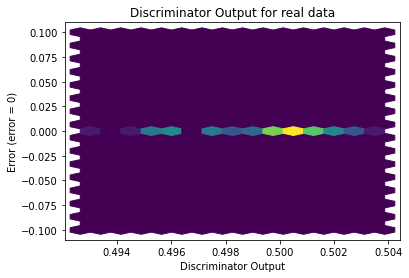

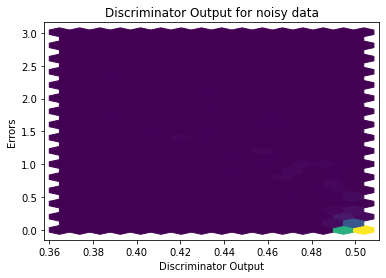

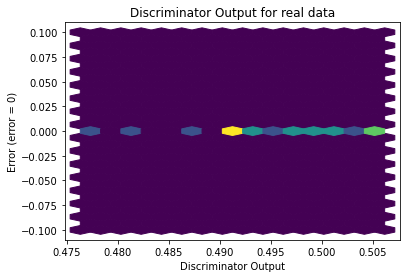

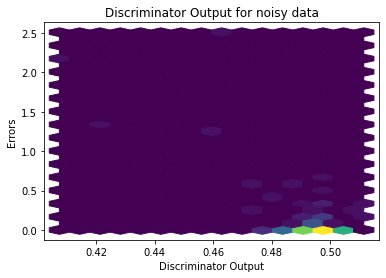

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


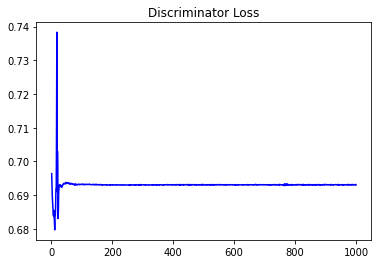

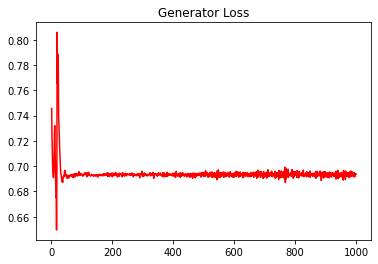

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.012316464210764726


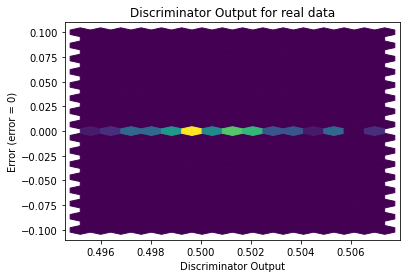

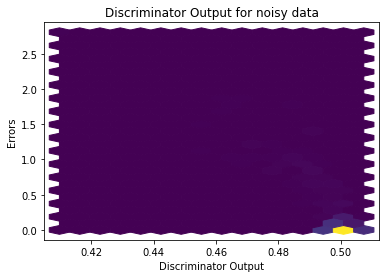

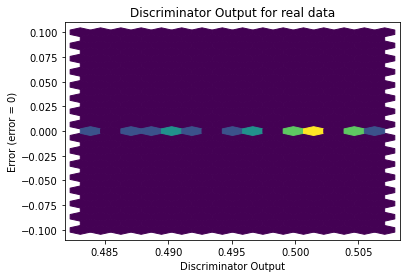

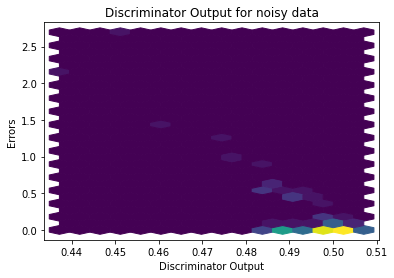

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7346]], requires_grad=True)
